# Modelo de Machine Learning para predecir el precio de casas residenciales en Ames, Iowa

_Por: Valentina Miranda Garcés_

Comunmente se intuye que el precio de una casa está asosiado a características generales como ubicación, área total, número de habitaciones. Sin embargo, hay muchas otras características que puede poseer una casa pero que no resulta tan evidente cómo estas influencia la variación en su precio. Por medio de este reto será posible identificar cuáles son esas características y adicionalmente, generar un modelo de regresión lineal que estime el precio de una casa de acuerdo con unas características específicas.

Gracias a la información brindad en Kaggle sobre el dataset, sabemos que este contiene 79 variables que describen diferentes aspectos de las casas residenciales en la ciudad de Ames, Iowa, en Estados Unidos.

A pesar de que hay varios archivos que se descargan de Kaggle, se usa únicamente `train.csv` para todo el desarrollo.

Otra cosa importante para mencionar es que el dataset fue construido por Dean De Cock, profesor de estadística de la Universidad Truman State, para su uso en la enseñanza de ciencia de datos.

Se inicia todo el proceso para desarrollar el modelo:

## 1. Cargar los datos y prepararlos

In [1]:
#se importan las librerías necesarias para todo el desarrollo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('train.csv')
X = df_train.drop(columns=['SalePrice'])
y = df_train['SalePrice']

Dividimos el dataset en train, validation y test usando `train_test_split` de scikit learn. Primero tomamos el 40% del dataset inicial, dejando el 60% para train y luego el 40% restante se divide en dos 50% para validation y test.

In [3]:
# Split the dataset into train and temporary (test + validation) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary set into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Guardamos como dataframes cada uno de los conjuntos de datos que separamos:

In [4]:
# Combine X_train and y_train into df_train
df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Rename the last column to 'SalePrice' if it's not already named that way
df_train.columns = list(X_train.columns) + ['SalePrice']
df_val.columns = list(X_val.columns) + ['SalePrice']
df_test.columns = list(X_test.columns) + ['SalePrice']

En estas líneas siguientes organizamos los índices de las variables que contienen el target, puesto que inicialmente aparecen sin columnas:

In [5]:
y_train = y_train.reset_index()
y_val = y_val.reset_index()
y_test = y_test.reset_index()

Al tener el dataset cargado, lo primero es identificar características generales del mismo, para tener una idea de lo que se va a trabajar. De igual forma, se complementa con la información adicional del archivo `data_description.txt` para entender mejor cada variable

In [6]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
314,315,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,178000
442,443,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,162900
319,320,80,RL,NaN,14115,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,187500
767,768,50,RL,75.0,12508,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,1300,7,2008,WD,Normal,160000
756,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950


In [7]:
df_train.shape

(876, 81)

Observamos que el dataset contiene 81 columnas. Una de ellas corresponde a un `Id`, una numeración que no contribuye como característica, por lo que podemos eliminarla luego, y la última columna `SalePrice`, que es el **target**, lo que queremos predecir con el modelo. Por lo tanto. esto nos da en total 79 **features** o **variables**, lo que corresponde con la información brindada en Kaggle.

Ahora vamos a revisar la organización del dataset, verificando que se siga un formato consistente con los nombres y variables cualitativas:

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Como vemos, todos los nombres de las columnas siguen un mismo formato Camel Case, por lo que se va a dejar así.

Queremos conocer en términos generales cuáles son los tipos de datos de cada columna. Adicionalmente, revisamos datos nulos para tomar decisiones sobre ellos.

In [9]:
#revisar tipos de datos y cantidad de datos nulos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 314 to 1126
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             876 non-null    int64  
 1   MSSubClass     876 non-null    int64  
 2   MSZoning       876 non-null    object 
 3   LotFrontage    709 non-null    float64
 4   LotArea        876 non-null    int64  
 5   Street         876 non-null    object 
 6   Alley          58 non-null     object 
 7   LotShape       876 non-null    object 
 8   LandContour    876 non-null    object 
 9   Utilities      876 non-null    object 
 10  LotConfig      876 non-null    object 
 11  LandSlope      876 non-null    object 
 12  Neighborhood   876 non-null    object 
 13  Condition1     876 non-null    object 
 14  Condition2     876 non-null    object 
 15  BldgType       876 non-null    object 
 16  HouseStyle     876 non-null    object 
 17  OverallQual    876 non-null    int64  
 18  Overall

De acuerdo con esto hay algunas cosas por resaltar.
Lo primero es que se tienen 3 columnas con datos tipo `float64`, 35 de tipo`int64`, lo que da un total de 38 variables cuantitativas. Vemos que hay 43 columnas de tipo `object`, que asumimos en general como cualitativas. 

Adicionalmente, observamos que hay una cantidad considerable de datos nulos, por lo que, para manejarlos con mayor facilidad, vamos a extraer únicamente las columnas que contienen datos nulos

In [10]:
columns_with_nulls = df_train.columns[df_train.isnull().any()]
#null_counts = df_train[columns_with_nulls].isnull().sum()
df_train[columns_with_nulls].isnull().sum()

LotFrontage     167
Alley           818
MasVnrType        2
MasVnrArea        2
BsmtQual         22
BsmtCond         22
BsmtExposure     22
BsmtFinType1     22
BsmtFinType2     22
Electrical        1
FireplaceQu     420
GarageType       46
GarageYrBlt      46
GarageFinish     46
GarageQual       46
GarageCond       46
PoolQC          872
Fence           709
MiscFeature     839
dtype: int64

Teniendo todas las features que tienen datos nulos, vamos a ir estudiando una por una con el documento complementario `data_description.txt` y así poder tomar decisiones más acertadas sobre cómo manejar estos datos nulos en cada caso específico.

LotFrontage: Linear feet of street connected to property

En este sentido, sería posible deducir que los valores nulos indican que la casa no está directamente conectada con una calle, por lo tanto, podemos reemplazarlos por ceros.

In [11]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(0)

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access


MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

En estas **features** sí se indica claramente lo que significan los valores nulos, por lo que se pueden reemplazar por valores que indiquen la ausencia de lo que describe la variable

In [12]:
df_train['Alley']=df_train['Alley'].fillna('NA_Access')

MasVnrArea: Masonry veneer area in square feet

En este caso podría inferirse que los datos nulos indican que la propiedad no tiene Masonry veneer, sin embargo, en ese orden de ideas sería posible pensar que la cantidad de valores nulos en esta columna corresponda con la de MasVnrType, pero difieren en gran medida, por lo tanto revisamos estas dos features para ver qué sucede

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df_train[df_train['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,0.0,7851,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900


In [15]:
df_train[df_train['MasVnrType'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,0.0,7851,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900


Con esto se observa que la mayoría de las casas que tienen datos nulos en la columna `MasVnrType` les corresponde un valor de cero en la columna `MasVnrArea`. Luego para los datos nulos de `MasVnrArea`, que son muy pocos, se observa que todos corresponden a valores nulos para `MasVnrType`. Con esto se concluye que los valores nulos se pueden reemplazar por ceros.

In [16]:
df_train['MasVnrType']=df_train['MasVnrType'].fillna('NoMasVnr')
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(0)

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Todas estas columnas son consistentes entre sí, pues los datos nulos indican que no hay sótano y la cantidad es similar.


In [17]:
df_train['BsmtQual']= df_train['BsmtQual'].fillna('NoBasement')
df_train['BsmtCond']= df_train['BsmtCond'].fillna('NoBasement')
df_train['BsmtExposure']= df_train['BsmtExposure'].fillna('NoBasement')
df_train['BsmtFinType1']= df_train['BsmtFinType1'].fillna('NoBasement')
df_train['BsmtFinType2']= df_train['BsmtFinType2'].fillna('NoBasement')

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

Para esta feature solo se tiene un dato nulo, por lo que podríamos estudiarlo más a fondo para tomar acciones sobre él.

In [18]:
df_train[df_train['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


Con lo cual observamos que el resto de los datos son bastante coherentes con las tendencias generales del dataset, por lo que se decide llenar este valor para una feature cualitativa con la moda de esta

In [19]:
most_frequent = df_train['Electrical'].mode()[0]
df_train['Electrical'] = df_train['Electrical'].fillna(most_frequent)

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

Para esta feature se conoce el significado de los valores nulos

In [20]:
df_train['FireplaceQu']= df_train['FireplaceQu'].fillna('NoFireplace')

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Todas estas features con consistentes con los valores nulos y tienen un significado específico


In [21]:
df_train['GarageType']= df_train['GarageType'].fillna('NoGarage')
df_train['GarageFinish']= df_train['GarageFinish'].fillna('NoGarage')
df_train['GarageQual']= df_train['GarageQual'].fillna('NoGarage')
df_train['GarageCond']= df_train['GarageCond'].fillna('NoGarage')

Con la feature `GarageYrBlt` se le asigna un valor numérico, este será cero

In [22]:
df_train['GarageYrBlt']= df_train['GarageYrBlt'].fillna(0)

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
Por último, en estas features también hay una explicación para los datos nulos


In [23]:
df_train['PoolQC']= df_train['PoolQC'].fillna('NoPool')
df_train['Fence']= df_train['Fence'].fillna('NoFence')
df_train['MiscFeature']= df_train['MiscFeature'].fillna('NothingElse')

En conclusión, es posible establecer que la mayoría de los datos nulos corresponde a la ausencia de la característica.

Volvemos a revisar que todos los datos nulos hayan sido tratados:

In [24]:
columns_with_nulls = df_train.columns[df_train.isnull().any()]
#null_counts = df_train[columns_with_nulls].isnull().sum()
df_train[columns_with_nulls].isnull().sum()

Series([], dtype: float64)

Ya que nos aseguramos de tener datos limpios y estandarizados, continuamos con el proceso

In [25]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
314,315,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1925,1990,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Gd,No,LwQ,16,Unf,0,712,728,GasA,Ex,Y,SBrkr,832,809,0,1641,0,1,1,1,3,1,Ex,6,Typ,1,Gd,Detchd,1925.0,Unf,2,546,Fa,TA,Y,0,0,234,0,0,0,NoPool,NoFence,NothingElse,0,8,2006,WD,Normal,178000
442,443,50,RM,52.0,6240,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,7,1930,1992,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,1078,1078,GasA,TA,Y,SBrkr,1128,445,0,1573,0,0,2,0,3,1,TA,8,Typ,1,Gd,Detchd,1930.0,Unf,2,360,TA,TA,P,0,0,0,0,0,0,NoPool,NoFence,NothingElse,0,6,2008,WD,Normal,162900
319,320,80,RL,0.0,14115,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,7,5,1980,1980,Gable,CompShg,Plywood,Plywood,BrkFace,225.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,336,1372,GasA,TA,Y,SBrkr,1472,0,0,1472,1,0,2,0,3,1,TA,6,Typ,2,TA,Attchd,1980.0,Unf,2,588,TA,TA,Y,233,48,0,0,0,0,NoPool,NoFence,NothingElse,0,6,2009,WD,Normal,187500
767,768,50,RL,75.0,12508,Pave,NA_Access,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,6,7,1940,1985,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,660,Unf,0,323,983,GasA,Ex,Y,SBrkr,983,767,0,1750,1,0,2,0,4,1,TA,7,Mod,0,NoFireplace,Attchd,1989.0,Unf,1,423,TA,TA,Y,245,0,156,0,0,0,NoPool,NoFence,Shed,1300,7,2008,WD,Normal,160000
756,757,60,RL,68.0,10769,Pave,NA_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,20,Unf,0,846,866,GasA,Ex,Y,SBrkr,866,902,0,1768,0,0,2,1,3,1,Gd,7,Typ,0,NoFireplace,Attchd,2007.0,RFn,2,578,TA,TA,Y,144,105,0,0,0,0,NoPool,NoFence,NothingElse,0,4,2009,WD,Normal,212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NA_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,Gd,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,NoPool,NoFence,NothingElse,0,3,2007,WD,Normal,176432
1130,1131,50,RL,65.0,7804,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NoPool,MnPrv,NothingElse,0,12,2009,WD,Normal,135000
1294,1295,20,RL,60.0,8172,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,167,Unf,0,697,864,GasA,TA,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NoFireplace,Detchd,1957.0,Unf,2,572,TA,TA,N,0,0,0,0,0,0,NoPool,NoFence,NothingElse,0,4,2006,WD,Normal,115000
860,861,50,

## 2. Distribución de las variables y correlación

Dado que son 79 features, lo ideal sería conocer de antemano cuáles variables presentan mayor correlacion con el precio y conocer más sobre estas, por lo que se calcula la matriz de correlación, aclarando que esto funciona para las variables numéricas. Es decir que vamos a tratar las variables numéricas primero

In [26]:
numerical_type_cols = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()

In [27]:
corr_num = df_train[numerical_type_cols].corr()

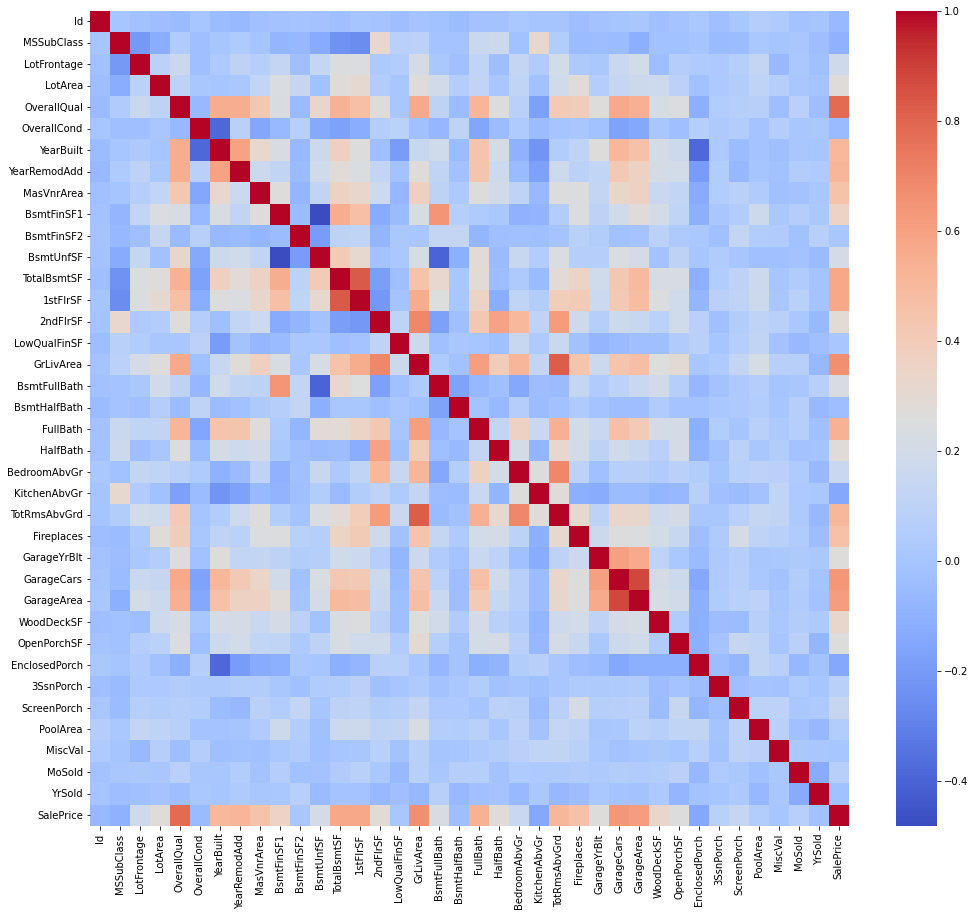

In [28]:
plt.figure(figsize=(17, 15))
sns.heatmap(corr_num, cmap="coolwarm")

plt.show()

Por el momento queremos conocer los que tienen alta correlación con el target por lo que, por criterio propio, se extraen las features cuya correlación con el target sea mayor a 0.5 (se toma que también incluya los que son menores que -0.4 pero no parece haber ninguna correlación que cumpla esto.

In [29]:
saleprice_corr = corr_num['SalePrice']

# Filter variables with correlation > 0.5 or < -0.4
significant_corr = saleprice_corr[(saleprice_corr > 0.5) | (saleprice_corr < -0.4)]
significant_vars = significant_corr.index.tolist()
significant_vars

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [30]:
significant_vars.remove('SalePrice')
significant_vars

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

Es decir, de 38 variables cuantitativas que brinda el dataset, vamos a concentrarnos en 10 de ellas. Lo primero que vamos a hacer es conocer la distribución de estas variables

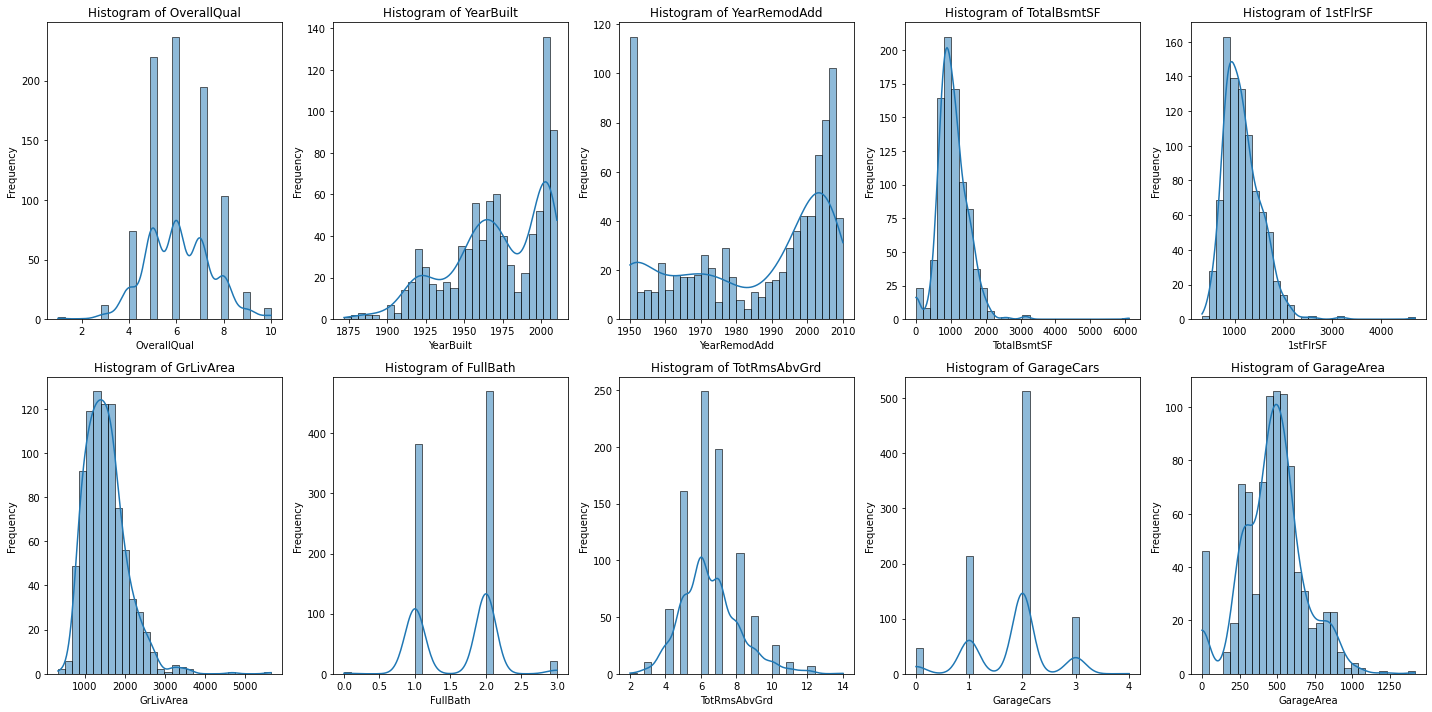

In [31]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the significant variables and plot histograms
for i, var in enumerate(significant_vars):
    sns.histplot(df_train[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


A modo de prueba, graficamos las distribuciones del $\ln (1+feature)$ para ver si tal vez sería posible transformar algunas features, puesto que lo que siempre se trata es obtener distribuciones normales.

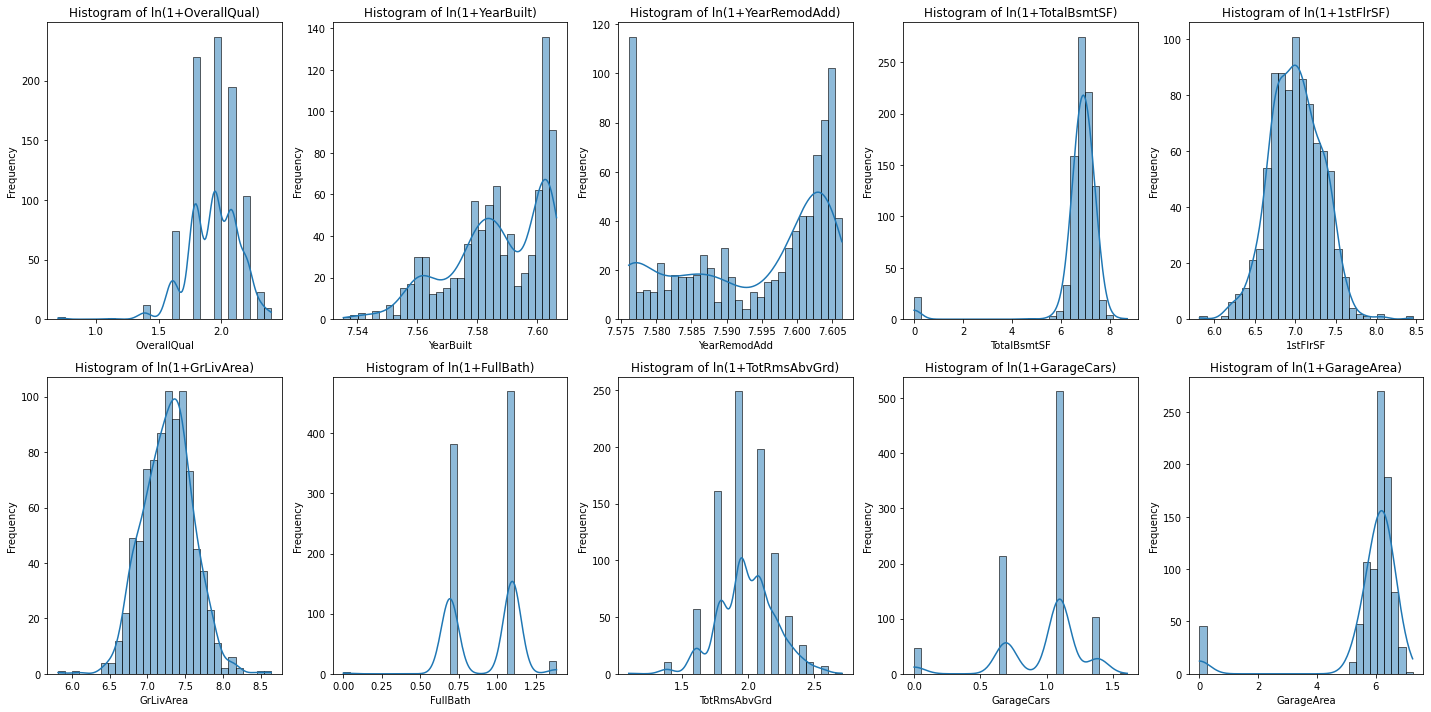

In [32]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the significant variables and plot histograms
for i, var in enumerate(significant_vars):
    sns.histplot(np.log1p(df_train[var]), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of ln(1+{var})')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Observamos que de hecho dos de las distribuciones de las features se acomodan más a una normal cuando se les realiza la transformación, por lo que se van a guardar estas dos nuevas columnas para probar cómo esto puede modificar (para mejorar, idealmente) el modelo.

Ahora vamos a revisar la distribución del target

<AxesSubplot:>

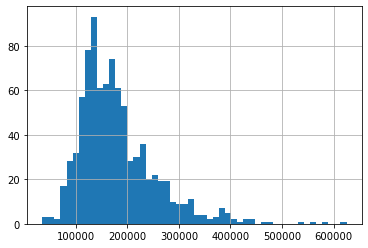

In [33]:
df_train.SalePrice.hist(bins=50)

Con lo cual observamos una distribución con cola derecha. Sin embargo, queremos que se ajuste a una distribución normal por lo que transformamos los datos de la columna usando $\ln$ para cumplir con los supuestos de la regresión lineal.

<AxesSubplot:>

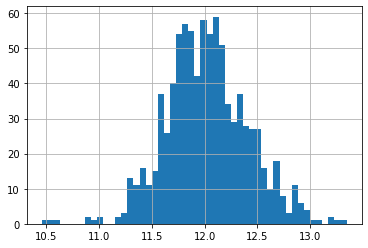

In [34]:
df_train['SalePriceTransformed'] = np.log1p(df_train.SalePrice)
df_train.SalePriceTransformed.hist(bins=50)

Nota: vamos a eliminar esta columna transformada por el momento, pues más adelante vamos a crear una función que organice las features para el modelo, de forma que se generalice para usar esta misma función en los dataset de validation y test.

In [35]:
df_train.drop(columns=['SalePriceTransformed'], inplace=True)

Podemos descartar el resto de las columnas numéricas.

Con esto acabamos de trabajar con las features cuantitativas. Encontramos las que tiene un coeficiente de correlación mayor y estas se analizaron más profundamente, realizando transformaciones en algunas de ellas. Adicionalmente, tratamos los valores nulos del dataset completo. El paso siguiente será estudiar las variables categóricas para decidir las que van a contribuir al modelo.

In [36]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
314,315,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1925,1990,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Gd,No,LwQ,16,Unf,0,712,728,GasA,Ex,Y,SBrkr,832,809,0,1641,0,1,1,1,3,1,Ex,6,Typ,1,Gd,Detchd,1925.0,Unf,2,546,Fa,TA,Y,0,0,234,0,0,0,NoPool,NoFence,NothingElse,0,8,2006,WD,Normal,178000
442,443,50,RM,52.0,6240,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,7,1930,1992,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,1078,1078,GasA,TA,Y,SBrkr,1128,445,0,1573,0,0,2,0,3,1,TA,8,Typ,1,Gd,Detchd,1930.0,Unf,2,360,TA,TA,P,0,0,0,0,0,0,NoPool,NoFence,NothingElse,0,6,2008,WD,Normal,162900
319,320,80,RL,0.0,14115,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,7,5,1980,1980,Gable,CompShg,Plywood,Plywood,BrkFace,225.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,336,1372,GasA,TA,Y,SBrkr,1472,0,0,1472,1,0,2,0,3,1,TA,6,Typ,2,TA,Attchd,1980.0,Unf,2,588,TA,TA,Y,233,48,0,0,0,0,NoPool,NoFence,NothingElse,0,6,2009,WD,Normal,187500
767,768,50,RL,75.0,12508,Pave,NA_Access,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,6,7,1940,1985,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,660,Unf,0,323,983,GasA,Ex,Y,SBrkr,983,767,0,1750,1,0,2,0,4,1,TA,7,Mod,0,NoFireplace,Attchd,1989.0,Unf,1,423,TA,TA,Y,245,0,156,0,0,0,NoPool,NoFence,Shed,1300,7,2008,WD,Normal,160000
756,757,60,RL,68.0,10769,Pave,NA_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,20,Unf,0,846,866,GasA,Ex,Y,SBrkr,866,902,0,1768,0,0,2,1,3,1,Gd,7,Typ,0,NoFireplace,Attchd,2007.0,RFn,2,578,TA,TA,Y,144,105,0,0,0,0,NoPool,NoFence,NothingElse,0,4,2009,WD,Normal,212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NA_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,Gd,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,NoPool,NoFence,NothingElse,0,3,2007,WD,Normal,176432
1130,1131,50,RL,65.0,7804,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NoPool,MnPrv,NothingElse,0,12,2009,WD,Normal,135000
1294,1295,20,RL,60.0,8172,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,167,Unf,0,697,864,GasA,TA,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NoFireplace,Detchd,1957.0,Unf,2,572,TA,TA,N,0,0,0,0,0,0,NoPool,NoFence,NothingElse,0,4,2006,WD,Normal,115000
860,861,50,

Podemos comenzar por conocer un poco más acerca de las features, un buen comienzo es saber la cantidad de categorías por cada feature y la proporción de los datos en cada una. Seguido a esto, se van a graficar los histogramas, que también nos dan una idea de la proporción de los datos en cada categoría, y a su vez se grafican los diagramas de cajas y bigotes, podemos identificar en mayor medida la dispersión de los datos, si estos están sesgados, y si hay valores atípicos. Finalmente, debemos de transformar los datos a numéricos para así obtener el Mutual Information Score y con todo esto poder determinar cuáles podrían ser las variables más adecuadas para considerar en el modelo. A continuación está el código para todos estos pasos.

In [37]:
ds_cat = df_train.select_dtypes(include = 'object').copy()
ds_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
314,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,TA,Gd,No,LwQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Detchd,Unf,Fa,TA,Y,NoPool,NoFence,NothingElse,WD,Normal
442,RM,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,P,NoPool,NoFence,NothingElse,WD,Normal
319,RL,Pave,NA_Access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NoPool,NoFence,NothingElse,WD,Normal
767,RL,Pave,NA_Access,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,Gd,TA,Mn,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Mod,NoFireplace,Attchd,Unf,TA,TA,Y,NoPool,NoFence,Shed,WD,Normal
756,RL,Pave,NA_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NoFireplace,Attchd,RFn,TA,TA,Y,NoPool,NoFence,NothingElse,WD,Normal


In [38]:
categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns

# Create a summary table
summary = []

for col in categorical_cols:
    categories = df_train[col].unique()
    num_categories = len(categories)
    summary.append({
        'Variable': col,
        'Number of Categories': num_categories,
        'Categories': ', '.join(map(str, categories))  # Convert categories to a comma-separated string
    })

# Convert the summary list to a DataFrame for better display
summary_df = pd.DataFrame(summary)

# Display the summary DataFrame
summary_df

,Variable,Number of Categories,Categories
0,MSZoning,5,"RM, RL, FV, RH, C (all)"
1,Street,2,"Pave, Grvl"
2,Alley,3,"Grvl, NA_Access, Pave"
3,LotShape,4,"Reg, IR1, IR2, IR3"
4,LandContour,4,"Lvl, Bnk, HLS, Low"
5,Utilities,2,"AllPub, NoSeWa"
6,LotConfig,5,"Inside, CulDSac, Corner, FR2, FR3"
7,LandSlope,3,"Gtl, Mod, Sev"
8,Neighborhood,25,"OldTown, BrkSide, NWAmes, Mitchel, CollgCr, NA..."
9,Condition1,9,"Norm, Feedr, PosA, RRAn, PosN, RRAe, Artery, R..."


In [39]:
# Identify categorical columns
categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\nVariable: {col}")
    category_percentages = df_train[col].value_counts(normalize=True) * 100
    for category, percentage in category_percentages.items():
        print(f"  Category: {category} - {percentage:.2f}%")


Variable: MSZoning
  Category: RL - 77.97%
  Category: RM - 15.98%
  Category: FV - 4.34%
  Category: RH - 1.37%
  Category: C (all) - 0.34%

Variable: Street
  Category: Pave - 99.66%
  Category: Grvl - 0.34%

Variable: Alley
  Category: NA_Access - 93.38%
  Category: Grvl - 4.34%
  Category: Pave - 2.28%

Variable: LotShape
  Category: Reg - 63.24%
  Category: IR1 - 32.65%
  Category: IR2 - 3.31%
  Category: IR3 - 0.80%

Variable: LandContour
  Category: Lvl - 90.30%
  Category: Bnk - 4.22%
  Category: HLS - 2.97%
  Category: Low - 2.51%

Variable: Utilities
  Category: AllPub - 99.89%
  Category: NoSeWa - 0.11%

Variable: LotConfig
  Category: Inside - 69.75%
  Category: Corner - 19.63%
  Category: CulDSac - 6.74%
  Category: FR2 - 3.65%
  Category: FR3 - 0.23%

Variable: LandSlope
  Category: Gtl - 93.95%
  Category: Mod - 5.02%
  Category: Sev - 1.03%

Variable: Neighborhood
  Category: NAmes - 15.18%
  Category: CollgCr - 10.16%
  Category: OldTown - 8.33%
  Category: Edwards - 

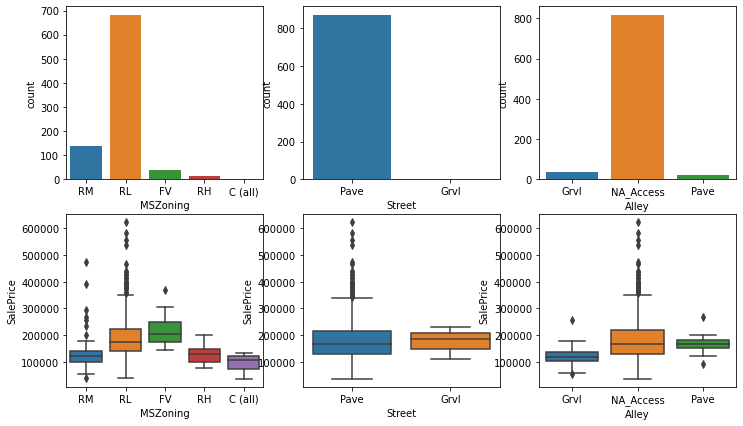

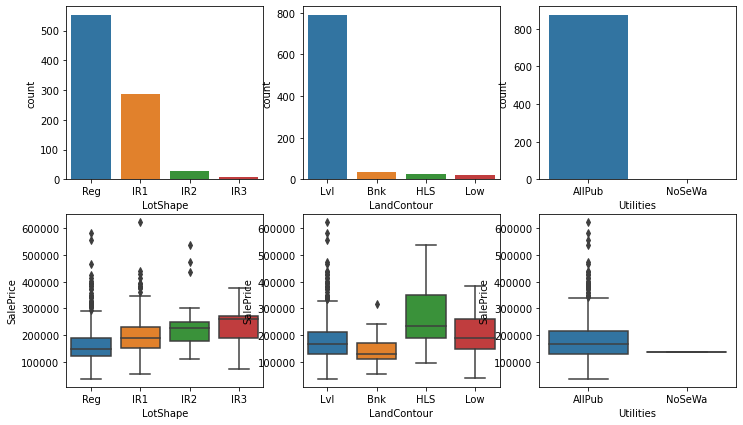

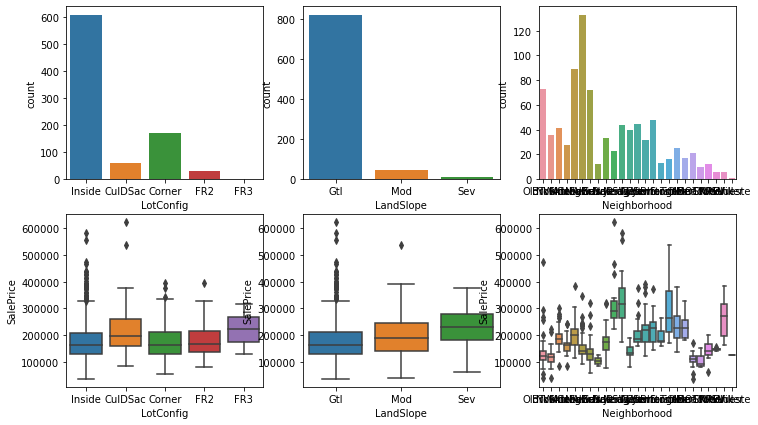

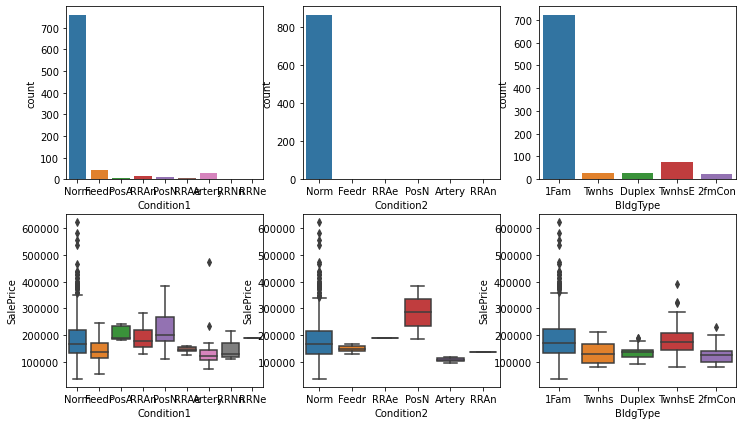

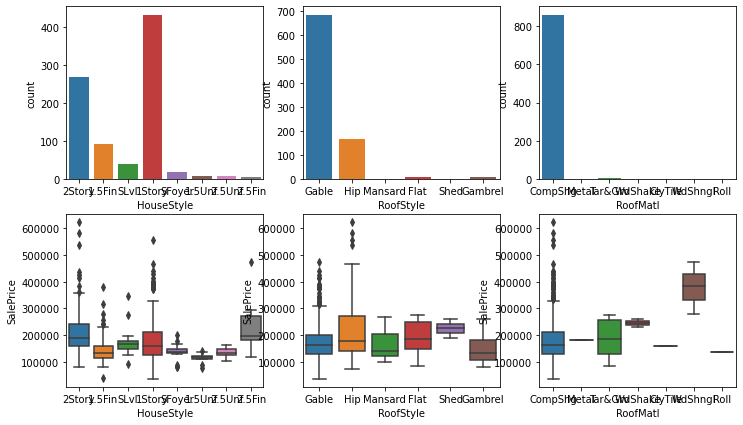

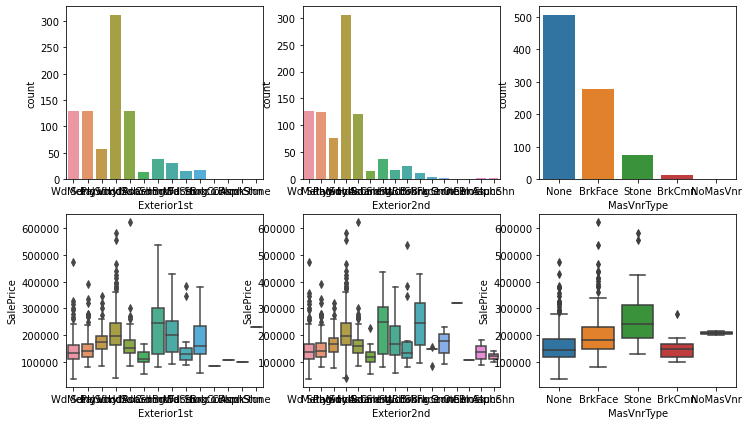

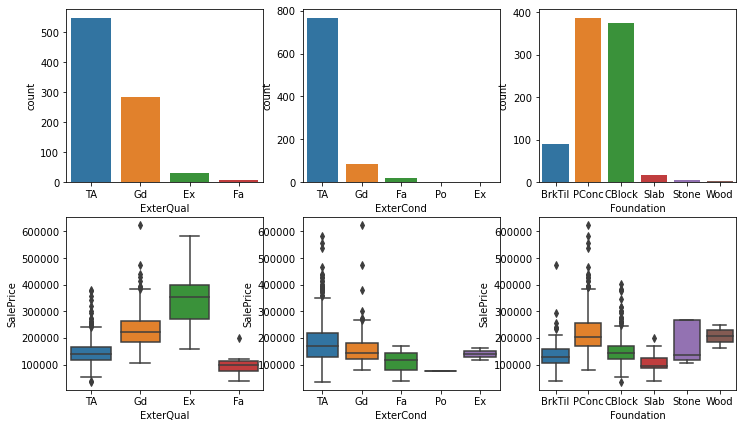

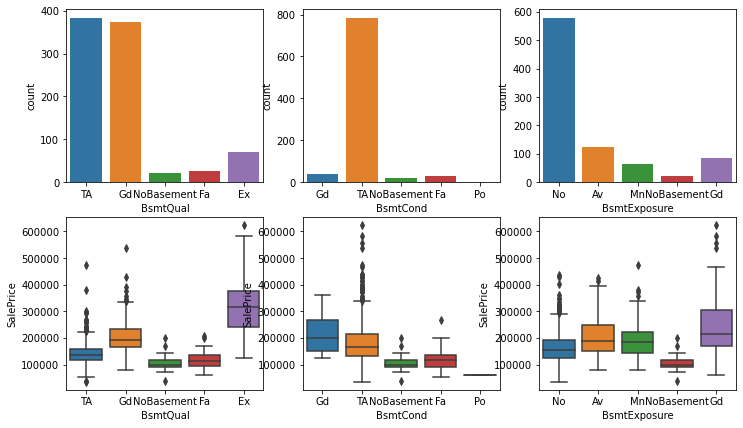

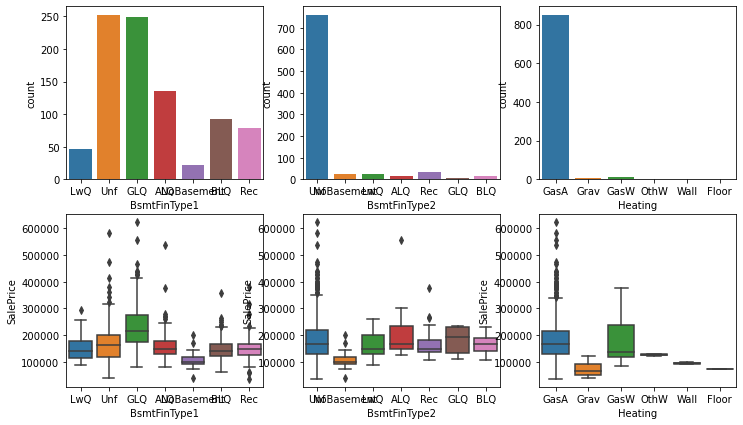

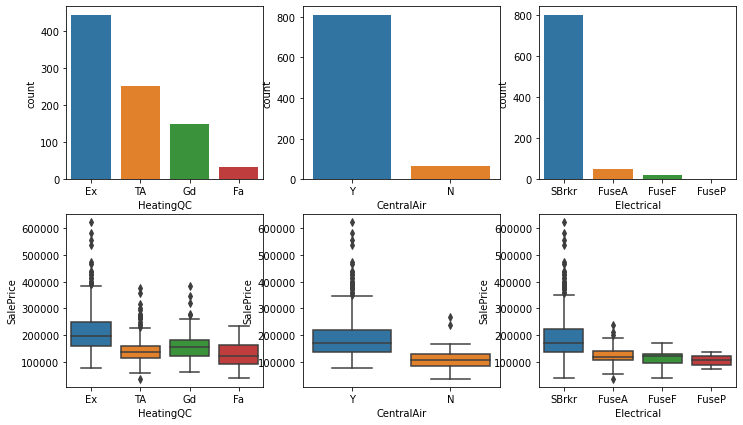

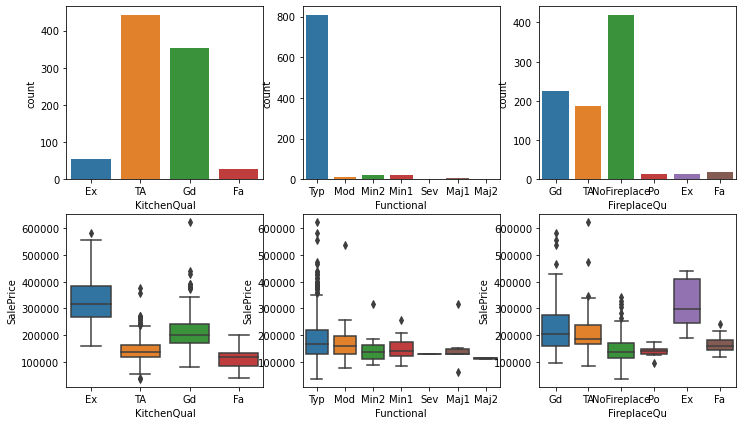

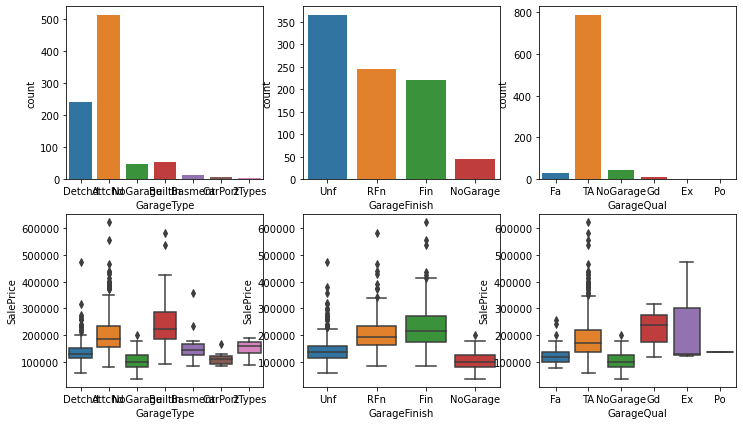

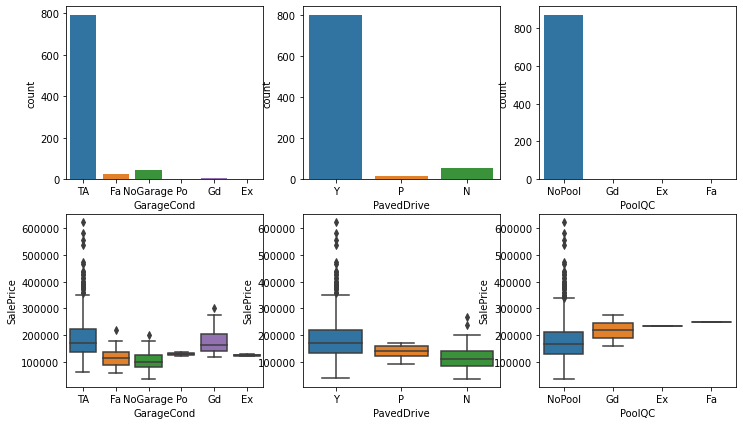

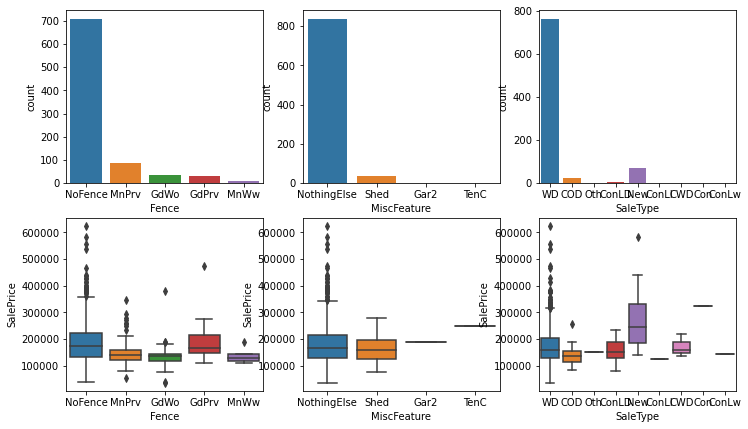

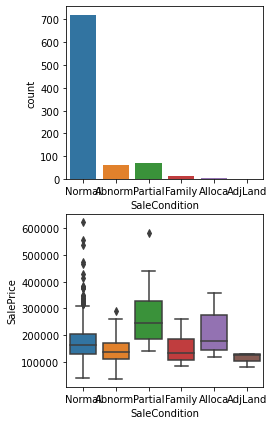

In [40]:
ds_cat['SalePrice'] = df_train.loc[ds_cat.index, 'SalePrice'].copy()
ix = 1
fig = plt.figure(figsize = (12,7))
plt.tight_layout()

for c in list(ds_cat.columns):
    if ix <= 3:
        if c != 'SalePrice':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = ds_cat, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=ds_cat, x=c, y='SalePrice', ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (12,7))
        
        ix =1

#plt.tight_layout()

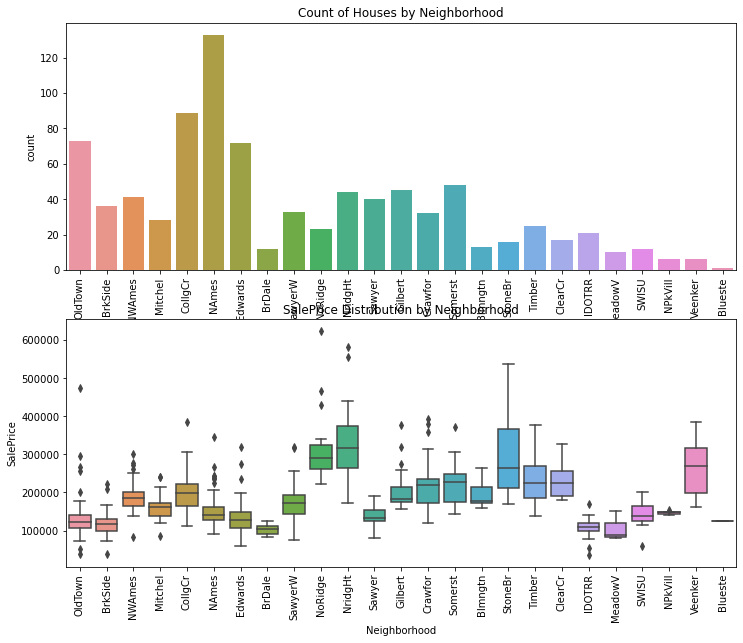

In [41]:
#vamos a graficar para la feature "Neighborhood" porque posee demasiadas categorías

# Create a new figure with appropriate size
fig = plt.figure(figsize=(12, 10))
plt.tight_layout()

# Plot countplot for Neighborhood
ax1 = fig.add_subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
sns.countplot(data=ds_cat, x='Neighborhood', ax=ax1)
ax1.set_title('Count of Houses by Neighborhood')
ax1.tick_params(axis='x', rotation=90)

# Plot boxplot for Neighborhood vs SalePrice
ax2 = fig.add_subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
sns.boxplot(data=ds_cat, x='Neighborhood', y='SalePrice', ax=ax2)
ax2.set_title('SalePrice Distribution by Neighborhood')
ax2.tick_params(axis='x', rotation=90)

# Show the plots
plt.show()


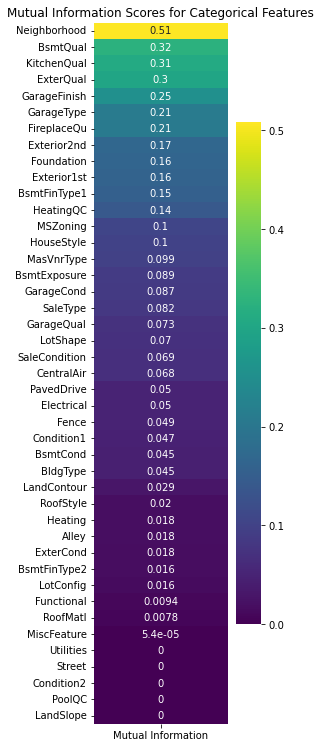

In [42]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original dataframe
df_copy = df_train.copy()

categorical_columns = df_copy.select_dtypes(include=['object', 'category']).columns
target = df_train['SalePrice']

# Initialize a LabelEncoder
le = LabelEncoder()

# List to store mutual information scores
mutual_info_scores = []

for column in categorical_columns:
    # Encode categorical features into integers in the copy
    df_copy[column] = le.fit_transform(df_copy[column].astype(str))
    
    # Calculate mutual information
    mi = mutual_info_regression(df_copy[[column]], target, discrete_features=True)
    mutual_info_scores.append(mi[0])

# Create a DataFrame for the mutual information scores
mi_df = pd.DataFrame(mutual_info_scores, index=categorical_columns, columns=['Mutual Information'])

# Plot the heatmap
plt.figure(figsize=(3, len(categorical_columns) * 0.3))  # Adjust height according to the number of features
sns.heatmap(mi_df.sort_values(by='Mutual Information', ascending=False), annot=True, cmap='viridis', cbar=True)
plt.title('Mutual Information Scores for Categorical Features')
plt.show()


El proceso para elegir las features que se van a presentar a continuación fue así:
Primero revisé los porcentajes de los datos para cada característica y con esto identifiqué que en la mayoría de las features los datos están concentrados en una categoría. Seguido a esto, con el histograma de frecuencias pude terminar de comprobarlo, pero adicionalmente, como este estaba acompañado de diagramas de caja para el target, también me permitió visualizar de forma más clara cómo se organizaban los precios de acuerdo a estas categorías. Lo que quise hacer fue que antes de obtener los Mutual Information Scores, me tomé el tiempo de revisar estar gráficas y tratar de identificar cuáles podrían tener algún tipo de correlación con el target. Esto lo hice con fines meramente de aprendizaje y desarrollo de mi capacidad de interpretación, para luego revisar mis resultados con el Mutual Information Score y comparar entre los dos para poder decidir finalmente cuáles serán las variables.

El proceso del análisis con cada variable lo realicé tomando apuntes a mano, por lo que en este notebook solo presento los resultados relevantes que me llevaron a elegir las variables, sin embargo, también adjunto en los archivos de la tarea esos apuntes que me llevaron a sacar las conclusiones. 

De acuerdo con toda la información brindada con estos códigos, además de un poco de razonamiento e intuición, las variables categóricas que elegí para el modelo son:

- `Neighborhood`
- `BsmtQual`
- `KitchenQual`
- `ExterQual`
- `GarageFinish`
- `FireplaceQu`
- `HeatingQC`
- `HouseStyle`
- `MasVnrType`
- `SaleType`
- `CentralAir`

Después de estudiarlos uno por uno, determiné una forma específica para agruparlos (de ser necesario, si contiene muchas características) para pasarlos a variables numéricas y poder probar el modelo.

In [43]:
selected_cat=['Neighborhood','BsmtQual','KitchenQual','GarageFinish','FireplaceQu','ExterQual','HeatingQC','HouseStyle','SaleType','CentralAir']

Para facilitar todo el proceso, se va a crear una función que haga todas las modificaciones a las variables, además esta va a servir para arreglar los datos del set de valuation y test.

In [44]:
def transform_data(df_train,significant_vars,selected_cat):

    #----------------------------------------------------------------------------------------------------------
    #transforma a ln(1-ft) los que encontramos que mostraban una distribución más normal con esta transformación
    df_train['GrLivAreaTransformed'] = np.log1p(df_train.GrLivArea)
    df_train['1stFlrSFTransformed'] = np.log1p(df_train['1stFlrSF'])
    #----------------------------------------------------------------------------------------------------------

    
    #----------------------------------------------------------------------------------------------------------
    #se eliminan el resto de las features cuantitativas, teniendo la lista de las que vamos a conservar para el modelo
    
    # Identify numerical columns in the DataFrame
    numerical_columns = df_train.select_dtypes(include=['number']).columns.tolist()
    
    # Determine which numerical columns to drop
    columns_to_drop = [col for col in numerical_columns if col not in significant_vars]
    
    # Drop the columns from the original DataFrame in place
    df_train.drop(columns=columns_to_drop, inplace=True)
    #----------------------------------------------------------------------------------------------------------
    
    #----------------------------------------------------------------------------------------------------------
    #se eliminan las features cualitativas que no se van a usar para el modelo
    
    # Identify numerical columns in the DataFrame
    cat_columns = df_train.select_dtypes(include=['object']).columns.tolist()
    
    # Determine which numerical columns to drop
    cat_columns_to_drop = [col for col in cat_columns if col not in selected_cat]
    
    # Drop the columns from the original DataFrame in place
    df_train.drop(columns=cat_columns_to_drop, inplace=True)
    #----------------------------------------------------------------------------------------------------------
    
    #----------------------------------------------------------------------------------------------------------
    #agrupa los datos de la variable 'Neighborhood' y luego se hace one-hot-encoding
    df_train.loc[df_train['Neighborhood'].isin(['NridgHt', 'StoneBr']), 'Neighborhood'] = 'Group_1'
    df_train.loc[df_train['Neighborhood'].isin(['Gilbert', 'Crawfor', 'Somerst', 'NWAmes', 'CollgCr', 'Timber', 'ClearCr', 'Veenker', 'Blmngtn']), 'Neighborhood'] = 'Group_2'
    df_train.loc[df_train['Neighborhood'].isin(['NAmes', 'Edwards', 'OldTown', 'BrkSide',  'SawyerW']), 'Neighborhood'] = 'Group_3'
    df_train.loc[df_train['Neighborhood'].isin(['Mitchel', 'Sawyer', 'SWISU']), 'Neighborhood'] = 'Group_4'
    df_train.loc[df_train['Neighborhood'].isin(['BrDale', 'IDOTRR', 'MeadowV']), 'Neighborhood'] = 'Group_5'
    df_train.loc[df_train['Neighborhood'].isin(['NoRidge']), 'Neighborhood'] = 'Group_6'
    df_train.loc[df_train['Neighborhood'].isin(['NPkVill', 'Blueste']), 'Neighborhood'] = 'Group_7'

    #pasamos de 25 categorías a 7
    
    #a veces pasaba que en df_train no estaban todas las categorias entonces creaba menos dummies de los que debería. Luego al limpiar los df_val y df_test había inconsistencias con las columnas
    Neighborhood_Cats = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7']
    new_rows = [
        {col: np.nan for col in df_train.columns} for _ in range(len(Neighborhood_Cats))
    ]
    
    for i, category in enumerate(Neighborhood_Cats):
        new_rows[i]['Neighborhood'] = category

    new_rows_df = pd.DataFrame(new_rows)
    
    # Append the new rows to the DataFrame
    df_train = pd.concat([df_train, new_rows_df], ignore_index=True)

    df_train = pd.get_dummies(df_train, columns=['Neighborhood'], drop_first=True,dtype=int)
    df_train.dropna(inplace=True)
    #----------------------------------------------------------------------------------------------------------

    #----------------------------------------------------------------------------------------------------------
    #lo mismo para la variable 'BsmtQual'
    df_train.loc[df_train['BsmtQual'].isin(['TA', 'Gd']), 'BsmtQual'] = 'Ta_Gd'
    df_train.loc[df_train['BsmtQual'].isin(['NoBasement', 'Fa']), 'BsmtQual'] = 'NoBsmt_Fa'

    
    BsmtQual_Cats = ['Ta_Gd', 'NoBsmt_Fa', 'Ex', 'Po']


    new_rows = [
        {col: np.nan for col in df_train.columns} for _ in range(len(BsmtQual_Cats))
    ]
    
    
    for i, category in enumerate(BsmtQual_Cats):
        new_rows[i]['BsmtQual'] = category

    new_rows_df = pd.DataFrame(new_rows)
    
    # Append the new rows to the DataFrame    
    df_train = pd.concat([df_train, new_rows_df], ignore_index=True)
    
    df_train = pd.get_dummies(df_train, columns=['BsmtQual'], drop_first=True,dtype=int)

    df_train.dropna(inplace=True)
    #----------------------------------------------------------------------------------------------------------

    #----------------------------------------------------------------------------------------------------------
    #Agrupamos la variable KitchenQual
    df_train.loc[df_train['KitchenQual'].isin(['TA', 'Fa']), 'KitchenQual'] = 'Ta_Fa'

    
    KitchenQual_Cats = ['Ta_Fa', 'Gd', 'Ex', 'Po']

    new_rows = [
        {col: np.nan for col in df_train.columns} for _ in range(len(KitchenQual_Cats))
    ]
    
    
    for i, category in enumerate(KitchenQual_Cats):
        new_rows[i]['KitchenQual'] = category

    new_rows_df = pd.DataFrame(new_rows)
    
    # Append the new rows to the DataFrame    
    df_train = pd.concat([df_train, new_rows_df], ignore_index=True)
    
    df_train = pd.get_dummies(df_train, columns=['KitchenQual'], drop_first=True,dtype=int)

    df_train.dropna(inplace=True)
    #----------------------------------------------------------------------------------------------------------
    
    
    #----------------------------------------------------------------------------------------------------------
    #solo se hace OHE para ExterQual, no se agrupa primero
    df_train = pd.get_dummies(df_train, columns=['ExterQual'], drop_first=True,dtype=int)
    

    df_train.loc[df_train['GarageFinish'].isin(['Unf', 'NoGarage']), 'GarageFinish'] = False
    df_train.loc[df_train['GarageFinish'].isin(['RFn', 'Fin']), 'GarageFinish'] = True
    df_train.GarageFinish = df_train['GarageFinish'].astype(int)
    #----------------------------------------------------------------------------------------------------------

    #----------------------------------------------------------------------------------------------------------
    #Agrupamos algunas categorías de FireplaceQu
    df_train.loc[df_train['FireplaceQu'].isin(['Gd', 'TA']), 'FireplaceQu'] = 'Gd_TA'
    df_train.loc[df_train['FireplaceQu'].isin(['Po', 'Fa']), 'FireplaceQu'] = 'Po_Fa'

    
    FireplaceQu_Cats = ['Gd_TA', 'Po_Fa', 'Ex', 'NoFireplace']

    new_rows = [
        {col: np.nan for col in df_train.columns} for _ in range(len(FireplaceQu_Cats))
    ]
    
    
    for i, category in enumerate(FireplaceQu_Cats):
        new_rows[i]['FireplaceQu'] = category

    new_rows_df = pd.DataFrame(new_rows)
    
    # Append the new rows to the DataFrame
    df_train = pd.concat([df_train, new_rows_df], ignore_index=True)
    
    df_train = pd.get_dummies(df_train, columns=['FireplaceQu'], drop_first=True,dtype=int)
    df_train.dropna(inplace=True)
    #----------------------------------------------------------------------------------------------------------

    #----------------------------------------------------------------------------------------------------------
    #agrupamos las categorías de HeatingQC en dos grupos por lo que la feature queda binaria
    df_train.loc[df_train['HeatingQC'].isin(['Gd', 'TA', 'Fa','Po']), 'HeatingQC'] = 0
    df_train.loc[df_train['HeatingQC'].isin(['Ex']), 'HeatingQC'] = 1
    df_train.HeatingQC = df_train['HeatingQC'].astype(int)
    #----------------------------------------------------------------------------------------------------------

    #----------------------------------------------------------------------------------------------------------
    #Agrupamos algunas categorías de HouseStyle
    df_train.loc[df_train['HouseStyle'].isin(['2Story', '2.5Fin']), 'HouseStyle'] = 'Group_1'
    df_train.loc[df_train['HouseStyle'].isin(['1.5Fin','SLvl']), 'HouseStyle'] = 'Group_2'
    df_train.loc[df_train['HouseStyle'].isin(['SFoyer','1.5Unf','2.5Unf']), 'HouseStyle'] = 'Group_3'

    HouseStyle_Cats = ['Group_1', 'Group_2', 'Group_3', '1Story']
    new_rows = [
        {col: np.nan for col in df_train.columns} for _ in range(len(HouseStyle_Cats))
    ]
    
    
    for i, category in enumerate(HouseStyle_Cats):
        new_rows[i]['HouseStyle'] = category

    new_rows_df = pd.DataFrame(new_rows)
    
    # Append the new rows to the DataFrame    
    df_train = pd.concat([df_train, new_rows_df], ignore_index=True)
    
    df_train = pd.get_dummies(df_train, columns=['HouseStyle'], drop_first=True,dtype=int)
    df_train.dropna(inplace=True)
    #----------------------------------------------------------------------------------------------------------

    #----------------------------------------------------------------------------------------------------------
    #Agrupamos algunas de las características, aunque no fue posible reducirlas en gran medida
    df_train.loc[df_train['SaleType'].isin(['ConLD', 'COD', 'CWD']), 'SaleType'] = 'Group_1'
    df_train.loc[df_train['SaleType'].isin(['ConLI','ConLw']), 'SaleType'] = 'Group_2'

    SaleType_Cats = ['Group_1', 'Group_2', 'WD','VWD','New','Con','Oth']

    new_rows = [
        {col: np.nan for col in df_train.columns} for _ in range(len(SaleType_Cats))
    ]
    
    
    for i, category in enumerate(SaleType_Cats):
        new_rows[i]['SaleType'] = category

    new_rows_df = pd.DataFrame(new_rows)
    
    # Append the new rows to the DataFrame 
    df_train = pd.concat([df_train, new_rows_df], ignore_index=True)

    df_train = pd.get_dummies(df_train, columns=['SaleType'], drop_first=True,dtype=int)
    df_train.dropna(inplace=True)
    #----------------------------------------------------------------------------------------------------------

    #----------------------------------------------------------------------------------------------------------
    #Esta categoría es binaria por lo que solo es necesario que sea numérica
    df_train.loc[df_train['CentralAir'].isin(['Y']), 'CentralAir'] = 0
    df_train.loc[df_train['CentralAir'].isin(['N']), 'CentralAir'] = 1
    df_train.CentralAir = df_train['CentralAir'].astype(int)
    #----------------------------------------------------------------------------------------------------------

    df_train.dropna(inplace=True)

    

    return df_train

In [45]:
def handle_null(df_train):
    df_train['LotFrontage']=df_train['LotFrontage'].fillna(0)
    df_train['Alley']=df_train['Alley'].fillna('NA_Access')
    df_train['MasVnrType']=df_train['MasVnrType'].fillna('NoMasVnr')
    df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(0)
    df_train['BsmtQual']= df_train['BsmtQual'].fillna('NoBasement')
    df_train['BsmtCond']= df_train['BsmtCond'].fillna('NoBasement')
    df_train['BsmtExposure']= df_train['BsmtExposure'].fillna('NoBasement')
    df_train['BsmtFinType1']= df_train['BsmtFinType1'].fillna('NoBasement')
    df_train['BsmtFinType2']= df_train['BsmtFinType2'].fillna('NoBasement')
    most_frequent = df_train['Electrical'].mode()[0]
    df_train['Electrical'] = df_train['Electrical'].fillna(most_frequent)
    df_train['FireplaceQu']= df_train['FireplaceQu'].fillna('NoFireplace')

    df_train['GarageType']= df_train['GarageType'].fillna('NoGarage')
    df_train['GarageFinish']= df_train['GarageFinish'].fillna('NoGarage')
    df_train['GarageQual']= df_train['GarageQual'].fillna('NoGarage')
    df_train['GarageCond']= df_train['GarageCond'].fillna('NoGarage')
    df_train['GarageYrBlt']= df_train['GarageYrBlt'].fillna(0)

    df_train['PoolQC']= df_train['PoolQC'].fillna('NoPool')
    df_train['Fence']= df_train['Fence'].fillna('NoFence')
    df_train['MiscFeature']= df_train['MiscFeature'].fillna('NothingElse')

    return df_train

Ya que tenemos todas las funciones necesarias para desarrollar y probar el modelo, organizamos y limpiamos los datasets:

In [46]:
df_train = handle_null(df_train)
X_train = transform_data(df_train,significant_vars,selected_cat)
df_val = handle_null(df_val)
X_val = transform_data(df_val,significant_vars,selected_cat)
df_test = handle_null(df_test)
X_test = transform_data(df_test,significant_vars,selected_cat)


y_train = np.log1p(y_train.SalePrice.values)
y_val = np.log1p(y_val.SalePrice.values)
y_test = np.log1p(y_test.SalePrice.values)

Primero vamos a probar el modelo de regresión lineal básico desarrollado en la clase:

In [47]:
def train_linear_regression(X, y):

  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [48]:
#w0, w = train_linear_regression(X_train, y_train)

Vemos que este no funciona porque devuelve un error de matriz singular. Esto quiere decir que la matriz no es invertible y por lo tanto vamos a ir directamente a las funcionalidades de Scikit Learn, además de usar regularización

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

linear_regression = LinearRegression()
lr = LinearRegression().fit(X_train, y_train)

In [50]:
def rmse(y, y_pred):
  error = y - y_pred
  se = error ** 2
  mse = se.mean()

  rmse = np.sqrt(mse)

  return rmse

In [51]:
lr.score(X_train, y_train)

0.8458514330276988

In [52]:
lr.score(X_val, y_val)

0.8542039719728038

In [53]:
w0_lr = lr.intercept_
w_lr = lr.coef_

y_pred_val_lr = w0_lr + X_val.dot(w_lr)

print(f'RMSE:{rmse(y_val, y_pred_val_lr)}')

r2_lr = r2_score(y_val, y_pred_val_lr)
print(f'R^2: {r2_lr}')


mape_lr = mean_absolute_percentage_error(y_val, y_pred_val_lr)
print(f'MAPE: {mape_lr}')

RMSE:0.14424640562991137
R^2: 0.8542039719728038
MAPE: 0.009057288185882775


Con estas métricas podemos considerar un buen punto de partida del modelo, puesto que estas parecen estar en un rango aceptable, pero veremos si con regularización podemos mejorar estas métricas.

In [54]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

w0_ridge = ridge_model.intercept_
w_ridge = ridge_model.coef_

In [55]:
y_pred_ridge = w0_ridge + X_train.dot(w_ridge)
y_pred_val_ridge = w0_ridge + X_val.dot(w_ridge)

In [56]:
rid = ridge_model.fit(X_train, y_train)

In [57]:
rid.score(X_train, y_train)

0.8450450216963024

In [58]:
rid.score(X_val, y_val)

0.8593123167737107

In [59]:
y_pred_val_ridge = w0_ridge + X_val.dot(w_ridge)

print(f'RMSE:{rmse(y_val, y_pred_val_ridge)}')

r2_ridge = r2_score(y_val, y_pred_val_ridge)
print(f'R^2: {r2_ridge}')


mape_ridge = mean_absolute_percentage_error(y_val, y_pred_val_ridge)
print(f'MAPE: {mape_ridge}')

RMSE:0.14169684904598334
R^2: 0.8593123167737107
MAPE: 0.008949532277493746


In [60]:
print(w0_ridge)
print(w_ridge)

8.479487139878925
[ 6.59181495e-02  2.90769558e-04  1.21179366e-03  5.95405854e-06
  1.97519715e-02 -1.43875497e-01 -9.91181694e-06  2.04715805e-04
 -1.40310805e-02  1.24770053e-02  4.21993825e-02  6.91393925e-02
  6.14013430e-05 -4.76732454e-02 -1.51647541e-01 -1.16948185e-01
 -2.67780254e-01  5.21384951e-02 -1.40368405e-01 -1.27961321e-01
  0.00000000e+00 -5.73750061e-02 -4.74117433e-02  0.00000000e+00
 -9.00348338e-02 -6.64705702e-02 -9.35143234e-03  1.50361256e-03
 -2.68330478e-02 -9.18825994e-02 -3.09316171e-02 -7.28094371e-02
 -3.31455494e-02 -1.72884732e-02 -8.73551882e-02 -1.47057519e-01
 -6.28460455e-02  1.16630460e-01  0.00000000e+00 -5.98702281e-02]


Observamos que usando la regularación tipo Ridge hay una sutil mejora en las métricas. Ahora probamos con Lasso:

In [61]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01)
lss = lasso.fit(X_train, y_train)
w0_lasso = lasso.intercept_
w_lasso = lasso.coef_

In [62]:
print(w0_lasso)
print(w_lasso)

1.804745534445411
[ 8.29547686e-02  1.91692858e-03  2.71966634e-03  3.97346996e-05
  0.00000000e+00 -0.00000000e+00  5.79164860e-05  2.02253280e-04
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  3.74513488e-03
  2.98428338e-04  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -5.75063960e-02 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [63]:
lss.score(X_train, y_train)

0.7992645262669518

In [64]:
lss.score(X_val, y_val)

0.8540594419879455

In [65]:
y_pred_val_lasso = w0_lasso + X_val.dot(w_lasso)

print(f'RMSE:{rmse(y_val, y_pred_val_lasso)}')

r2_lasso = r2_score(y_val, y_pred_val_lasso)
print(f'R^2: {r2_lasso}')


mape_lasso = mean_absolute_percentage_error(y_val, y_pred_val_lasso)
print(f'MAPE: {mape_lasso}')

RMSE:0.14431788482910254
R^2: 0.8540594419879455
MAPE: 0.008813687995978908


Vemos que con la regularización con Lasso lo que sucede es que las métricas empeoran. Esto se intentó con diferentes valores para $\alpha$ y se concluyó que mientras mayor sea, el modelo es peor. Algo para resaltar es que, a pesar de que en clase se trabajó con valores mayores que 1, por cuestiones de curiosidad decidí intentar con número menores que uno (pero mayores que cero) y las métricas resultaban un poco mejores a comparación de con valores mayores que 1, sin embargo, estos no llegaban a superar a las métricas con regularización Ridge o incluso con la transformación lineal básica. Con esos $\alpha$ tan pequeños se ve que muchos de los coeficientes se vuelven cero, lo que podría indicar que hay variables que en realidad están generando ruido, sin embargo, al comparar estas métricas con las de los demás modelos, se decide solo continuar con hacer tuning del modelo usando Ridge.

In [66]:
from sklearn.model_selection import GridSearchCV

estimator = Ridge()

param_grid = {
    "alpha":list(np.arange(0.01, 1, 0.05))} #prueba diferentes valores de alpha
model_hp = GridSearchCV(estimator, param_grid, cv=5) #cross validation: va haciendo combinaciones de separación de datos para encontrar los mejores patrones
model_hp.fit(X_train, y_train)
model_hp.best_params_

{'alpha': 0.060000000000000005}

Esto no nos brinda un valor relevante para mejorar el modelo.

In [67]:
from sklearn.linear_model import Ridge
ridge_model_2 = Ridge(alpha=0.06)
ridge_model_2.fit(X_train, y_train)

w0_ridge_2 = ridge_model_2.intercept_
w_ridge_2 = ridge_model_2.coef_

y_pred_ridge_2 = w0_ridge_2 + X_train.dot(w_ridge_2)
y_pred_val_ridge_2 = w0_ridge_2 + X_val.dot(w_ridge_2)
y_pred_test_ridge_2 = w0_ridge_2 + X_test.dot(w_ridge_2)

rid_2 = ridge_model_2.fit(X_train, y_train)


In [68]:
w_ridge_2

array([ 6.45865493e-02,  2.44804055e-04,  1.17440930e-03,  3.79649453e-06,
        1.98260468e-02, -1.47441339e-01, -1.29095118e-05,  2.05734321e-04,
       -1.29015095e-02,  1.26050211e-02,  4.16041629e-02,  6.93574239e-02,
        6.17425758e-05, -6.24226358e-02, -1.70772511e-01, -1.36782261e-01,
       -2.93967712e-01,  4.30324083e-02, -1.77226949e-01, -1.34338104e-01,
        0.00000000e+00, -5.82478862e-02, -4.76042288e-02,  0.00000000e+00,
       -9.02030803e-02, -7.35195011e-02, -1.04215375e-02,  2.13381486e-03,
       -3.30830386e-02, -9.74031796e-02, -3.60033711e-02, -7.46470308e-02,
       -3.45607969e-02, -1.52667360e-02, -2.69996403e-01, -3.91808093e-01,
       -2.45769121e-01,  4.86166858e-02,  0.00000000e+00, -2.40594646e-01])

In [69]:
rid_2.score(X_train, y_train)

0.8458145968554031

In [70]:
rid_2.score(X_val, y_val)

0.8546132691610739

In [71]:
y_pred_val_ridge_2 = w0_ridge_2 + X_val.dot(w_ridge_2)

print(f'RMSE:{rmse(y_val, y_pred_val_ridge_2)}')

r2_ridge_2 = r2_score(y_val, y_pred_val_ridge_2)
print(f'R^2: {r2_ridge_2}')


mape_ridge_2 = mean_absolute_percentage_error(y_val, y_pred_val_ridge_2)
print(f'MAPE: {mape_ridge_2}')

RMSE:0.1440437898823766
R^2: 0.8546132691610739
MAPE: 0.009047034284365664


En resumen, las métricas son:

- linear regression:

    - RMSE: 0.1442464056299113
    - R^2: 0.8542039719728038
    - MAPE: 0.009057288185882778

- ridge 1:
    - RMSE: 0.14169684904598345
    - R^2: 0.8593123167737104
    - MAPE: 0.00894953227749375

- lasso:
    - RMSE: 0.14431788482910254
    - R^2: 0.8540594419879455
    - MAPE: 0.008813687995978915

- ridge 2:
    - RMSE: 0.14404378988237657
    - R^2: 0.8546132691610738
    - MAPE: 0.009047034284365664

En general, vemos que las métricas no cambian mucho entre cada modelo, sin embargo, por diferencias mínimas, el modelo de regresión lineal usando regularización de Ridge con el $\alpha$ por defecto es el que dió las mejores métricas, por lo que se usa este modelo para finalmente probar los datos del subconjunto `test`

In [72]:
y_pred_test_ridge = w0_ridge + X_test.dot(w_ridge)

In [73]:
rid.score(X_test, y_test)

0.8747662875551068

In [74]:
y_pred_test_ridge = w0_ridge + X_test.dot(w_ridge)

print(f'RMSE:{rmse(y_test, y_pred_test_ridge)}')

r2_ridge = r2_score(y_test, y_pred_test_ridge)
print(f'R^2: {r2_ridge}')


mape_ridge = mean_absolute_percentage_error(y_test, y_pred_test_ridge)
print(f'MAPE: {mape_ridge}')

RMSE:0.15741734018251535
R^2: 0.8747662875551068
MAPE: 0.009584136364616469


In [77]:
print(f'RMSE:{rmse(np.expm1(y_test), np.expm1(y_pred_test_ridge))}')

r2_ridge = r2_score(np.expm1(y_test), np.expm1(y_pred_test_ridge))
print(f'R^2: {r2_ridge}')


mape_ridge = mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_pred_test_ridge))
print(f'MAPE: {mape_ridge}')

RMSE:32209.849431258288
R^2: 0.8898323581950057
MAPE: 0.11923813152998894


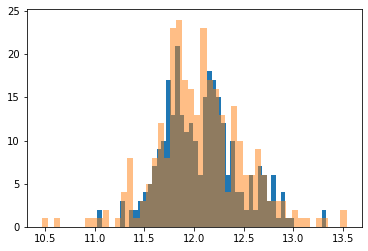

In [75]:
plt.hist(y_pred_test_ridge, bins=50)
plt.hist(y_test, bins=50, alpha=0.5)
plt.show()

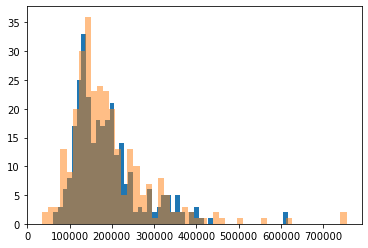

In [76]:
plt.hist(np.expm1(y_pred_test_ridge), bins=50)
plt.hist(np.expm1(y_test), bins=50, alpha=0.5)
plt.show()

### Conclusiones y comentarios finales

Partiendo de estos resultados podemos ver que el modelo parece tener una tendencia a predecir un precio más alto del que debería. A pesar de esto, considero (desde mi criterio personal) que es una buena estimación para la simplicidad del modelo.

Otra cosa que me gustaría resalta es el comportamiento de las métricas a medida que se intentaban los diferentes modelos con regularización y luego tuning. Con esto realmente esperar que se pudiera mejorar de alguna forma pero pasó lo contrario, lo que se sintió un poco incorrecto.

Sin embargo, al obedecer a las métricas se obtuvo un buen resultado, en lo que cabe.

Ahora, en cuanto a cómo abordé y cómo me sentí abordando todo el proceso. Algo que quiero resaltar de todo esto es la importancia del componente humano en todo el proceso de "aprendizaje de máquina". Lo que quiero decir con esto es que en realidad nunca me había enfrentado a un problema en el que haya tenido que usar tanto mi criterio personal para tomar decisiones, en este caso sobre las variables a elegir. El hecho de haber estudiado casi de a una característica por inidividual me brindó la oportunidad de reconocer mi falta de capacidad de análisis y creo que me motivó a trabajar mucho más en eso, pues, siendo sincera, me tomó una cantidad de tiempo y esfuerzo extraordinario elegir las variables y formular las justificaciones para la elección de las mismas. Adicionalmente, la parte de la limpieza de datos también fue muy enriquecedora porque me fue necesario recorrer las variables y esto a su vez me ayudó a aprender más de cada una.

También quiero hacer un comentario final en cuanto a la parte de programación y hacer código y es que no estoy nada orgullosa de las funciones que creé para limpiar y organizar la data. Siento que es un código que puede ser mejorado en grandes medidas y espero seguir aprendiendo cómo puedo mejorarlo.